# 데이터 로드

## CSV 파일 로드하기

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./bumping-into-data-analysis-main/datasets/example_1.csv')
df

,a,b,c,d,e,keyword
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [9]:
pd.read_table('./bumping-into-data-analysis-main/datasets/example_1.csv', sep=',')

,a,b,c,d,e,keyword
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [10]:
# 컬럼명 항목이 없는 데이터 로드하기 -> 헤더 영역을 데이터가 차지함!!!

pd.read_csv('./bumping-into-data-analysis-main/datasets/example_2.csv')

,1,2,3,4,5,Hello
0,11,12,13,14,15,Good
1,21,22,23,24,25,Nice
2,31,32,33,34,35,Beautiful
3,41,42,43,44,45,GoGo


In [11]:
# 헤더가 없는 데이터의 경우 헤더 영역을 데이터가 차지하지 않도록 Header=None 옵션을 주기 

pd.read_csv('./bumping-into-data-analysis-main/datasets/example_2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [12]:
# 로드할 때, 컬럼명 지정

pd.read_csv('./bumping-into-data-analysis-main/datasets/example_2.csv', names=['컬럼1', '컬럼2', '컬럼3', '컬럼4', '컬럼5', '키워드'])

,컬럼1,컬럼2,컬럼3,컬럼4,컬럼5,키워드
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [13]:
# 특정 컬럼을 인덱스로 지정해서 로드하기 -> 데이터 셋의 특정 변수가 인덱스여야 하는 상황에 유용

colNames = ['컬럼1', '컬럼2', '컬럼3', '컬럼4', '컬럼5', '키워드']
pd.read_csv('./bumping-into-data-analysis-main/datasets/example_2.csv', names=colNames, index_col='키워드')

,컬럼1,컬럼2,컬럼3,컬럼4,컬럼5
키워드,,,,,
Hello,1,2,3,4,5
Good,11,12,13,14,15
Nice,21,22,23,24,25
Beautiful,31,32,33,34,35
GoGo,41,42,43,44,45


In [15]:
# 일부 행을 건너뛰고 데이터 로드하기

pd.read_csv('./bumping-into-data-analysis-main/datasets/example_1.csv', skiprows=[1, 3]) #2행과 4행 생략

,a,b,c,d,e,keyword
0,11,12,13,14,15,Good
1,31,32,33,34,35,Beautiful
2,41,42,43,44,45,GoGo


In [16]:
# 데이터셋의 50%만 추출 (데이터 수가 많은 경우에 유용하게 사용됨)

pd.read_csv('./bumping-into-data-analysis-main/datasets/example_1.csv', skiprows = lambda x : x > 0 and np.random.rand() > 0.5)

,a,b,c,d,e,keyword
0,21,22,23,24,25,Nice
1,41,42,43,44,45,GoGo


In [17]:
# NA(결측값)가 포함된 데이터 로드하기
# 결측값을 잘 처리하는 것이 매우 중요한 데이터 분석 기술 중 하나

na_data = pd.read_csv('./bumping-into-data-analysis-main/datasets/example_3.csv')
na_data

,step,a,b,c,d,e,keyword
0,one,1.0,2.0,3.0,4,5.0,Hello
1,two,11.0,12.0,13.0,14,NaN,Good
2,three,NaN,22.0,23.0,24,25.0,Nice
3,four,31.0,32.0,NaN,34,35.0,Beautiful
4,five,41.0,NaN,43.0,44,45.0,NaN


In [18]:
# 파이썬은 결측값이 NaN이라고 나오는데, 더 정확하게 실제로 결측값인지 확인하려면

pd.isnull(na_data) #True 가 결측값

,step,a,b,c,d,e,keyword
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,True


In [19]:
# 특정 값들을 결측값으로 인식되도록 지정

na_data = pd.read_csv('./bumping-into-data-analysis-main/datasets/example_3.csv', na_values=['Null', 'NaN', 'one', 'two'])
na_data

,step,a,b,c,d,e,keyword
0,NaN,1.0,2.0,3.0,4,5.0,Hello
1,NaN,11.0,12.0,13.0,14,NaN,Good
2,three,NaN,22.0,23.0,24,25.0,Nice
3,four,31.0,32.0,NaN,34,35.0,Beautiful
4,five,41.0,NaN,43.0,44,45.0,NaN


In [20]:
# 인코딩 관련 에러 대응하기 UnicodeDecodeError : 한글 인코딩 깨짐

pd.read_csv('./bumping-into-data-analysis-main/datasets/서울시_지하철호선별_역별_승하차수.csv').head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbb in position 1: invalid start byte

In [21]:
# 위와 같이 한글 인코딩 에러가 발생한다면 engine='python' 설정
# 공공데이터 포탈에서 제공하는 데이터셋은 보통 'cp949'로 인코딩 되는 경우가 많음!
# 그 외의 경로로 다운받은 데이터셋이라면 'utf-8', 'euc-kr' 등을 시도해보면 됨 
# 'utf-8' 이 잘 안 된다면 'utf-8-sig' 시도해보기
# 여러 방법을 시도했는데도 인코딩 에러가 발생한다면 csv 파일을 엑셀에서 오픈하여 직접 인코딩 코덱 종류를 변경해주기


pd.read_csv('./bumping-into-data-analysis-main/datasets/서울시_지하철호선별_역별_승하차수.csv', encoding='cp949', engine='python').head()

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20210527,우이신설선,4.19민주묘지,2711,2708,20210530
1,20210527,경원선,가능,6327,6127,20210530
2,20210527,8호선,가락시장,7602,8441,20210530
3,20210527,3호선,가락시장,8696,8498,20210530
4,20210527,경부선,가산디지털단지,18780,21785,20210530


### 판다스로 로드 가능한 파싱 함수 목록

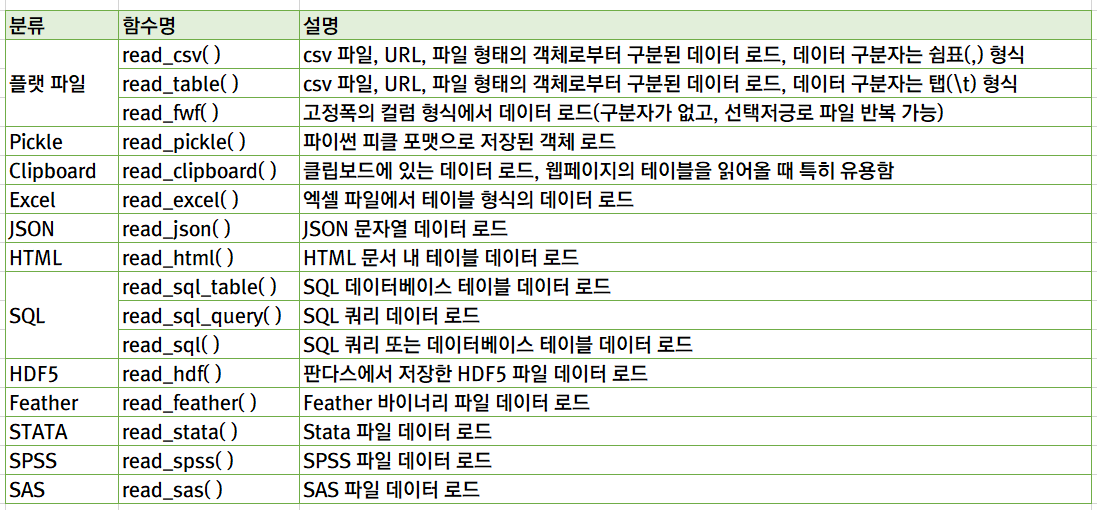

In [23]:
from IPython.display import Image

Image('./pandas_data_load_function.png')

## 데이터프레임 출력 관련 설정

In [24]:
### 현재 출력 컬럼과 로우 수 확인하기

pd.get_option('display.max_columns')

20

In [25]:
pd.get_option('display.max_rows')

60

In [26]:
pd.read_csv('./bumping-into-data-analysis-main/datasets/example_wide.csv')

# 디폴트 컬럼 출력 수가 20개 이므로 컬럼 부분 생략됨

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,keyword
0,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,Hello
1,11,12,13,14,15,16,17,18,19,20,...,28,29,30,31,32,33,34,35,36,Good
2,21,22,23,24,25,26,27,28,29,30,...,38,39,40,41,42,43,44,45,46,Nice
3,31,32,33,34,35,36,37,38,39,40,...,48,49,50,51,52,53,54,55,56,Beautiful
4,41,42,43,44,45,46,47,48,49,50,...,58,59,60,61,62,63,64,65,66,GoGo


### 최대 출력 컬럼 수 지정하기

In [27]:
#로드한 데이터가 27개의 컬럼을 갖고 있으므로 30으로 설정

pd.set_option("display.max_columns", 30) #방법1
pd.read_csv('./bumping-into-data-analysis-main/datasets/example_wide.csv')

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,keyword
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,Hello
1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,Good
2,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,Nice
3,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Beautiful
4,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,GoGo


In [28]:
pd.options.display.max_columns = 30 #방법2
pd.read_csv('./bumping-into-data-analysis-main/datasets/example_wide.csv')

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,keyword
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,Hello
1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,Good
2,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,Nice
3,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Beautiful
4,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,GoGo


### 최대 출력 로우 수 지정하기

In [29]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
pd.set_option("display.max_rows", 150)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 데이터 저장

### 데이터를 csv 파일로 저장하기

In [31]:
#to_csv(경로/파일명.csv)

iris.to_csv('./bumping-into-data-analysis-main/datasets/iris.csv')

In [32]:
# 특정 컬럼만 모은 데이터프레임 저장하기

iris.to_csv('./bumping-into-data-analysis-main/datasets/iris_sepal.csv', columns=['sepal_length', 'sepal_width', 'species'])

In [33]:
# 헤더 생략 후 저장하기

iris.to_csv('./bumping-into-data-analysis-main/datasets/iris_noheader.csv', header=False)

In [34]:
# 헤더를 원하는 이름으로 변경하여 저장하기

iris.to_csv('./bumping-into-data-analysis-main/datasets/iris_headername.csv', 
            header=['꽃받침_길이', '꽃받침_넓이', '꽃잎_길이', '꽃잎_넓이', '종류'], encoding='cp949') #한글을 사용했으므로 인코딩 후 저장

In [35]:
# 인덱스 생략하여 저장하기

iris.to_csv('./bumping-into-data-analysis-main/datasets/iris_noindex.csv', index=False)

### 데이터를 엑셀 파일로 저장하기

In [36]:
iris.to_excel('./bumping-into-data-analysis-main/datasets/iris.xlsx')

# 데이터 확인

In [37]:
import pandas as pd
import seaborn as sns

#### 시본 라이브러리에서 제공하는 펭귄 데이터셋 활용

In [38]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
# 데이터 앞부분 확인하기 : head()

df.head() #기본값 5개
df.head(10) #확인하고 싶은 개수가 있다면 입력

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [42]:
# 데이터 끝부분 확인하기 : tail()

df.tail()
df.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


### 데이터 차원과 길이 확인

In [43]:
# 데이터 차원 확인하기

df.shape

(344, 7)

In [44]:
# 모든 값의 개수 확인하기
# 데이터프레임의 경우 모든 셀의 데이터 수 반환, 시리즈의 경우 행 수 반환

df.size

2408

In [45]:
# 데이터 길이 확인하기 == 행의 수 확인하기

len(df)

344

### 데이터 타입 확인과 변경

In [47]:
df.dtypes # 데이터프레임이라면 데이터의 모든 컬럼 이름과 해당 데이터 타입을 1라인씩 출력

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

#### 자동으로 데이터 타입 변경하기

In [48]:
# 위의 결과를 보면 species, island, sex의 경우 텍스트 형식인데 object로 출력하고 있음 
# -> 자동으로 데이터 타입 추론하는 convert_dtypes() 함수 사용
# -> 좀 더 가능성이 높은 혹은 적합해 보이는 데이터 타입으로 자동 변경해주는 역할. (100%의 정확성을 보이는 것은 아님 !)

df = df.convert_dtypes()
df.dtypes

species               string
island                string
bill_length_mm       Float64
bill_depth_mm        Float64
flipper_length_mm      Int64
body_mass_g            Int64
sex                   string
dtype: object

#### 수동으로 데이터 타입 변경하기

In [49]:
# 방법1
# df.astype({'컬럼명' : '변경할 데이터 타입'})

df = df.astype({'species':'category'})
df = df.astype({'island':'category'})
df = df.astype({'sex':'category'})

In [50]:
# 방법2
# 타입 세트 동시에 입력
# astype({'컬럼명' : '변경할 데이터 타입', '컬럼명' : '변경할 데이터 타입', '컬럼명' : '변경할 데이터 타입'})

df = df.astype({'species' : 'category', 'island' : 'category', 'sex' : 'category'})

In [52]:
# 방법3
# df['컬럼명'] = df['컬럼명'].astype('변경할 데이터 타입')

df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [53]:
df.dtypes

species              category
island               category
bill_length_mm        Float64
bill_depth_mm         Float64
flipper_length_mm       Int64
body_mass_g             Int64
sex                  category
dtype: object

#### 데이터 타입 변경 시 유의사항

#### 1. astype() 함수에 적용 가능한 데이터 타입 고려
#### 2. 결측값이 있는 경우 에러 발생 -> 결측값이 존재하는 행 삭제 or 적당한 값 채워넣기

In [54]:
# 데이터 프레임 요약 정보 확인
# 인덱스 범위, 컬럼 수, 각 컬럼당 null이 아닌 수, 메모리 사용량

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    Float64 
 3   bill_depth_mm      342 non-null    Float64 
 4   flipper_length_mm  342 non-null    Int64   
 5   body_mass_g        342 non-null    Int64   
 6   sex                333 non-null    category
dtypes: Float64(2), Int64(2), category(3)
memory usage: 13.6 KB


# 기술통계 : 통계 기법에 속하며 데이터 표본의 특징을 나타내는 요약된 정보

## 기술통계 정보 확인하기

### 결측값을 제외한 데이터 분포의 중심 경향, 분산, 차원의 모양을 요약하는 통계가 포함됨
### 숫자 또는 오브젝트 데이터 타입인 집합에 관해서도 모두 분석


In [55]:
df = sns.load_dataset('penguins')
df.describe() #수치형 변수 관련 데이터만 제공

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [56]:
df.describe(include='all') #모든 변수를 포함한 기술통계 테이블 확인

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [57]:
df.describe(include=[object]) #오브젝트 타입만 확인

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [58]:
df.describe(include=[np.number]) # 숫자 데이터 타입의 변수만 기술통계 계산하기

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [59]:
df.describe(exclude=['category']) # 카테고리 타입의 변수를 제외하고 기술통계 계산하기

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


#### 백분위수 구하기

In [63]:
df = df.fillna(0) #결측값 0으로 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [67]:
#넘파이로 백분위수 구하기

point5 = np.percentile(df['bill_depth_mm'], q=[0, 25, 50 75, 100]) #백분위수 배열로 출력하기
point5

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2760378804.py, line 2)

In [66]:
#판다스로 백분위수 구하기

df.quantile([0, .25, .5, .75, 1.0]) #원하는 백분위수 소수점으로 입력

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\1305298843.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0, .25, .5, .75, 1.0])


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0.00,0.00,0.0,0.0,0.0
0.25,39.20,15.5,190.0,3550.0
0.50,44.25,17.3,197.0,4025.0
0.75,48.50,18.7,213.0,4750.0
1.00,59.60,21.5,231.0,6300.0


In [68]:
df.quantile(.25) #한개만 백분위수 입력 가능

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\3524304872.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(.25) #한개만 백분위수 입력 가능


bill_length_mm         39.2
bill_depth_mm          15.5
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [70]:
df['bill_length_mm'].quantile(.25)

39.2

### 데이터 수 파악하기

In [71]:
df.count() #결측값이 아닌 모든 데이터 셀 수

species              344
island               344
bill_length_mm       344
bill_depth_mm        344
flipper_length_mm    344
body_mass_g          344
sex                  344
dtype: int64

In [72]:
df['bill_length_mm'].count() #특정 컬럼의 데이터 셀 수

344

In [73]:
df.count(axis='columns') #개별 행의 컬럼 수

0      7
1      7
2      7
3      7
4      7
      ..
339    7
340    7
341    7
342    7
343    7
Length: 344, dtype: int64

In [74]:
df.max() #최댓값 찾기 ( 기준축에서 가장 큰 값을 출력 )

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\3871902245.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max() #최댓값 찾기


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
dtype: object

In [75]:
df['bill_length_mm'].max()

59.6

In [76]:
df['bill_length_mm'].idxmax() #최댓값이 위치한 인덱스 (최댓값 59.6이 위치한 인덱스는 253행)

253

In [77]:
df.min() #최솟값 찾기

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\2351246944.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min() #최솟값 찾기


species              Adelie
island               Biscoe
bill_length_mm          0.0
bill_depth_mm           0.0
flipper_length_mm       0.0
body_mass_g             0.0
dtype: object

In [78]:
df['bill_length_mm'].min()

0.0

In [80]:
df['bill_length_mm'].idxmin()

3

In [81]:
df.mean() #평균값 계산하기

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\222483269.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() #평균값 계산하기


bill_length_mm         43.666570
bill_depth_mm          17.051453
flipper_length_mm     199.747093
body_mass_g          4177.325581
dtype: float64

In [82]:
df.std() #표준편차 계산하기

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\3256447646.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std() #표준편차 계산하기


bill_length_mm         6.388776
bill_depth_mm          2.362696
flipper_length_mm     20.750566
body_mass_g          861.234942
dtype: float64

In [83]:
df.sum() #데이터 합계 계산하기

C:\Users\serye\AppData\Local\Temp\ipykernel_1948\3291714272.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum() #데이터 합계 계산하기


species              AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdel...
island               TorgersenTorgersenTorgersenTorgersenTorgersenT...
bill_length_mm                                                 15021.3
bill_depth_mm                                                   5865.7
flipper_length_mm                                              68713.0
body_mass_g                                                  1437000.0
dtype: object

### 기술통계 시각화

In [84]:
import seaborn as sns

### 막대그래프 : 합계를 표현하는 막대그래프

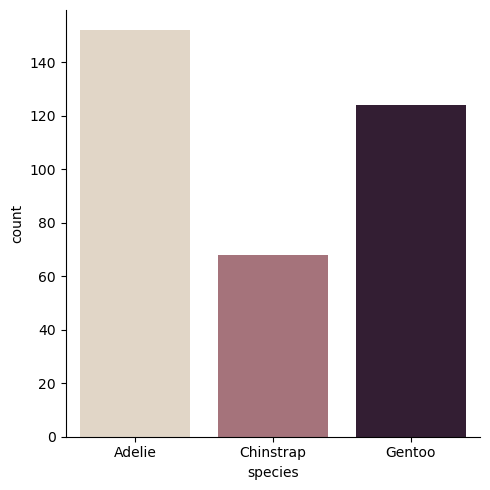

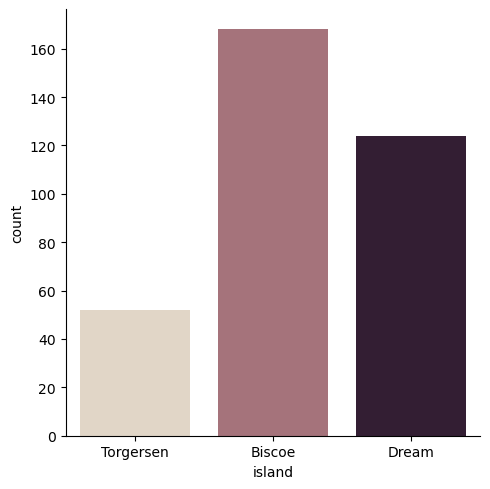

In [85]:
sns.catplot(data=df, x='species', kind='count', palette='ch:.25')
sns.catplot(data=df, x='island', kind='count', palette='ch:.25')

<Axes: xlabel='island', ylabel='bill_length_mm'>

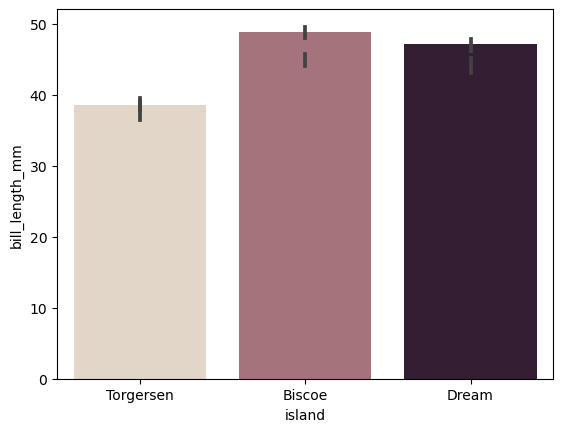

In [86]:
#시본에서 평균(이나 계산)을 표현하는 막대그래프

sns.barplot(data=df, x='species', y='bill_length_mm', palette='ch:.25')
sns.barplot(data=df, x='island', y='bill_length_mm', palette='ch:.25')

### 히스토그램 : 하나의 빈에 속하는 관측값의 개수를 계산하여 변수의 분포를 나타내는 그래프. 숫자 타입 컬럼에 사용


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

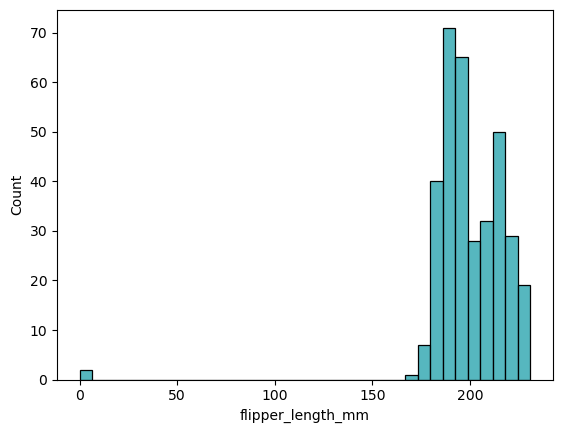

In [88]:
sns.histplot(data=df, x='flipper_length_mm', color='#1E9FAA')

<Axes: xlabel='body_mass_g', ylabel='Count'>

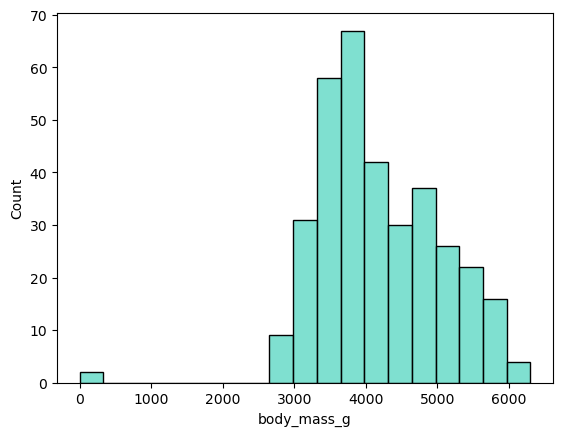

In [89]:
sns.histplot(data=df, x='body_mass_g', color='#54D6C1')

### 박스플롯 : 변수의 분포를 표시

<Axes: >

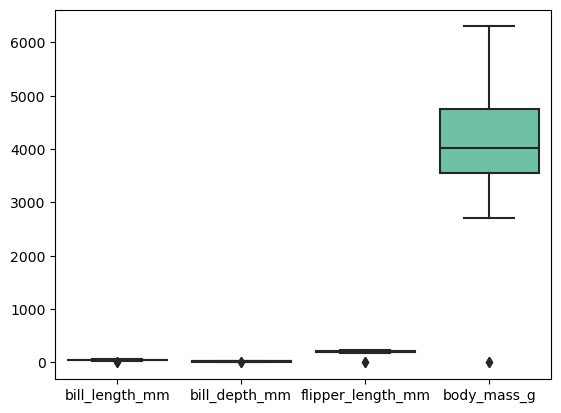

In [90]:
sns.boxplot(data=df, palette='mako')

<Axes: xlabel='species', ylabel='body_mass_g'>

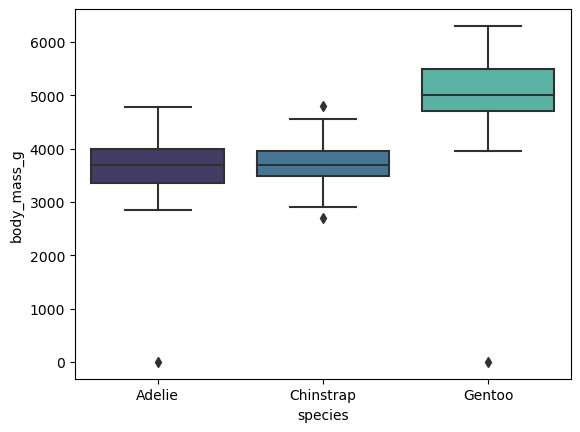

In [91]:
sns.boxplot(data=df, x='species', y='body_mass_g', palette='mako')

## 고윳값 확인하기

In [93]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [94]:
df['bill_depth_mm'].unique()

array([18.7, 17.4, 18. ,  0. , 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2,
       18.9, 18.6, 17.9, 16.7, 17. , 20. , 18.5, 19.1, 19.7, 16.9, 18.8,
       17.7, 19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. ,
       16.5, 20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3,
       14.1, 15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1,
       14.3, 15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8,
       14.9, 15.6, 14. , 14.7])

In [95]:
df['island'].value_counts() #고윳값의 개수를 포함, 가장 빈도가 높은 요소가 상위로 

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [96]:
df['island'].value_counts(normalize=True) #고윳값 결과를 비중으로 확인

Biscoe       0.488372
Dream        0.360465
Torgersen    0.151163
Name: island, dtype: float64

In [97]:
df['bill_depth_mm'].value_counts() #총 개수를 기준으로 각 값의 개수를 백분위한 비중의 수치로 변경되어 출력

17.0    12
15.0    10
18.6    10
17.9    10
18.5    10
17.3     9
18.9     9
19.0     9
17.8     9
18.1     9
14.5     8
17.1     8
18.8     7
20.0     6
16.1     6
19.5     6
17.5     6
16.6     6
17.2     6
18.7     6
13.7     6
15.7     6
14.2     6
14.6     5
19.1     5
18.2     5
18.0     5
14.4     5
15.9     5
19.4     5
18.4     5
15.3     4
15.8     4
13.9     4
16.5     4
14.3     4
13.8     4
15.2     4
16.0     4
16.3     4
16.8     4
19.2     4
18.3     4
17.6     4
14.1     3
20.3     3
20.7     3
21.1     3
19.9     3
14.8     3
15.6     3
19.8     3
19.6     3
16.2     3
15.1     3
21.2     2
15.4     2
19.3     2
14.7     2
13.5     2
19.7     2
0.0      2
16.4     2
15.5     2
16.9     2
14.0     2
17.7     2
16.7     2
13.6     1
14.9     1
13.3     1
20.6     1
17.4     1
20.2     1
13.1     1
21.5     1
13.2     1
20.8     1
20.1     1
20.5     1
13.4     1
Name: bill_depth_mm, dtype: int64

In [98]:
# bins 사용하여 연속형 변수를 범주형 변수로 변경
# 수치의 고윳값 대신 전체 데이터를 지정한 수 기준으로 인덱스를 나누어 계산
# 어느 구간에 데이터가 밀접해 있는지 어느 구간에 어느 정도의 데이터가 존재하는지 정확하게 수치로 구할 수 있게 해줌

df['bill_depth_mm'].value_counts(bins=5)

(17.2, 21.5]      176
(12.9, 17.2]      166
(-0.0225, 4.3]      2
(4.3, 8.6]          0
(8.6, 12.9]         0
Name: bill_depth_mm, dtype: int64

In [99]:
df['bill_depth_mm'].value_counts(bins=3)

(14.333, 21.5]      306
(7.167, 14.333]      36
(-0.0225, 7.167]      2
Name: bill_depth_mm, dtype: int64